# Predicting Neurodegenerative Disease from Aging Biomarkers
## Exploring Datasets


This project replicates and extends computational methods from [Shi et al. (2021)](https://www.frontiersin.org/articles/10.3389/fgene.2021.657636/full) to predict neurodegenerative diseases using DNA methylation patterns.


### Data Sources

**Metadata File (`Text S1.txt`):** Sample information from NCBI GEO database
- Combines data from multiple published studies (GSE138597, GSE15745, GSE53740, etc.)
- Includes samples from different tissue types and methylation platforms
- Pre-split into training and testing sets for reproducible evaluation

**Gene Mapping File (`Text S2.txt`):** CpG site annotations
- Maps technical probe IDs (e.g., cg00000292) to gene symbols (e.g., ATP2A1)
- Allows biological interpretation of model findings
- Note: Multiple CpG sites can map to the same gene, providing different regulatory information


### Diseases Under Study

| Condition | Full Name | Clinical Features |
|-----------|-----------|-------------------|
| **AD** | Alzheimer's Disease | Memory loss, cognitive decline, most common dementia |
| **PD** | Parkinson's Disease | Tremor, rigidity, slow movement (motor symptoms) |
| **PSP** | Progressive Supranuclear Palsy | Parkinson-like symptoms plus eye movement problems, falls |
| **FTD** | Frontotemporal Dementia | Behavior/personality changes, language problems, earlier onset |
| **Normal aged** | Healthy older adults | Control group for disease comparison |
| **Healthy young** | Healthy younger adults | Control group for aging comparison |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load metadata
df = pd.read_csv('Text S1.txt', sep='\t',
                 names=['Organ', 'GPL', 'GSE', 'GSM', 'Age', 'Condition', 'Split'])

df

,Organ,GPL,GSE,GSM,Age,Condition,Split
0,brain,GPL21145,GSE138597,GSM4114048,65,Normal aged,Train
1,brain,GPL21145,GSE138597,GSM4114049,66,Normal aged,Test
2,brain,GPL21145,GSE138597,GSM4114050,70,Normal aged,Test
3,brain,GPL21145,GSE138597,GSM4114057,65,Normal aged,Test
4,brain,GPL21145,GSE138597,GSM4114058,66,Normal aged,Train
...,...,...,...,...,...,...,...
1132,Peripheral Blood,GPL13534,GSE53740,GSM1300566,69,FTD,Train
1133,Peripheral Blood,GPL13534,GSE53740,GSM1300572,56,FTD,Train
1134,Peripheral Blood,GPL13534,GSE53740,GSM1300574,64,FTD,Train
1135,Peripheral Blood,GPL13534,GSE53740,GSM1300576,66,FTD,Train


In [3]:
## AD Patients
print("How many AD patient samples?")
print(f"A1: {len(df[df['Condition'] == 'AD'])}")

print("\nAge range for AD patients:")
ad_patients = df[df['Condition'] == 'AD']
print(f"{ad_patients['Age'].min()} to {ad_patients['Age'].max()} years")

How many AD patient samples?
A1: 128

Age range for AD patients:
55 to 97 years


## Tissue Type Distribution

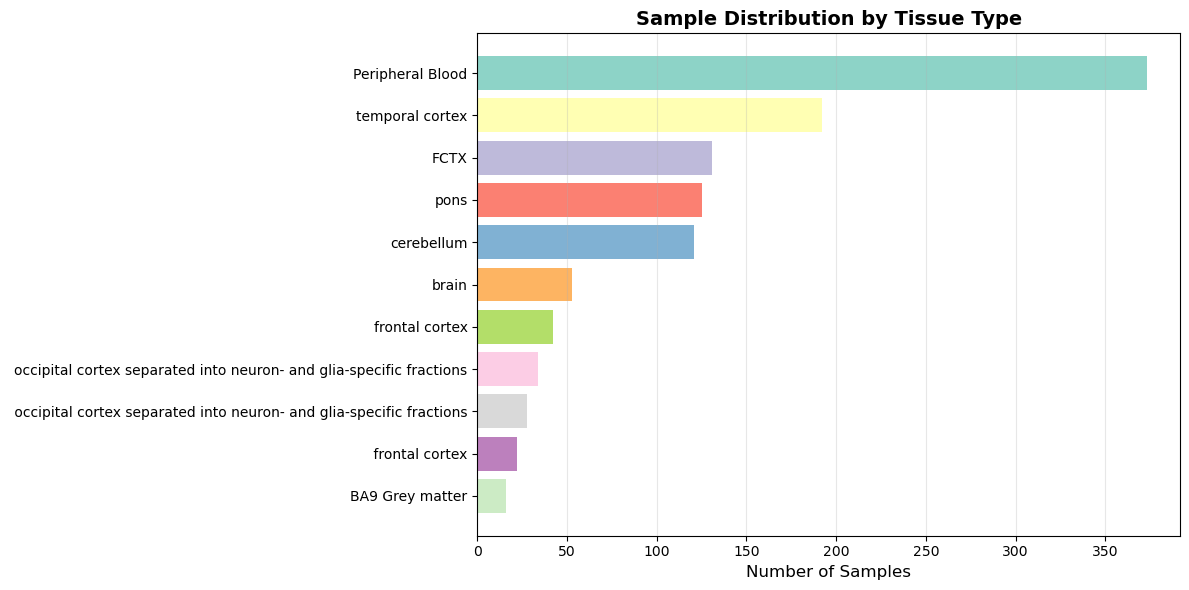

In [4]:
# Visualize tissue distribution (sorted from greatest to least, top to bottom)
fig, ax = plt.subplots(figsize=(12, 6))
organ_counts = df['Organ'].value_counts()
colors = plt.cm.Set3(range(len(organ_counts)))
ax.barh(organ_counts.index[::-1], organ_counts.values[::-1], color=colors[::-1])  # Reverse order
ax.set_xlabel('Number of Samples', fontsize=12)
ax.set_title('Sample Distribution by Tissue Type', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Which tissues have which conditions?

In [8]:
tissue_condition = pd.crosstab(df['Organ'], df['Condition'])
print("=== SAMPLES BY TISSUE AND CONDITION ===\n")
print(tissue_condition)

=== SAMPLES BY TISSUE AND CONDITION ===

Condition                                           AD  FTD  Healthy young  \
Organ                                                                        
 frontal cortex                                      0    0              0   
 occipital cortex separated into neuron- and gl...   0    0              0   
BA9 Grey matter                                      7    0              0   
FCTX                                                 0    0             88   
Peripheral Blood                                    15  123             11   
brain                                                0    0              4   
cerebellum                                           0    0             82   
frontal cortex                                      37    0              5   
occipital cortex separated into neuron- and gli...  30    0              4   
pons                                                 0    0             85   
temporal cortex        

## Train/Test Split

In [5]:
print("\nTraining samples per condition:")
train_df = df[df['Split'] == 'Train']
print(train_df['Condition'].value_counts())

print("\nTesting samples per condition:")
test_df = df[df['Split'] == 'Test']
print(test_df['Condition'].value_counts())


How many training samples per condition?
Normal aged      300
Healthy young    250
AD                85
FTD               85
PSP               30
PD                25
Name: Condition, dtype: int64

How many testing samples per condition?
Normal aged      142
Healthy young    116
AD                43
FTD               38
PSP               12
PD                11
Name: Condition, dtype: int64


### Modeling Considerations

- **Dataset size:** 1,137 samples from multiple studies, tissues, and platforms
- **Class imbalance:** Imbalance favoring Normal aged/Healthy young; PD and PSP underrepresented
- **Age confounding:** Overlapping age distributions require model to learn disease-specific, not age-specific patterns
- **Data heterogeneity:** Multiple tissues and platforms may require stratified analysis
- **Gene mapping:** ~27,000 CpG sites mapping to thousands of genes